In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        count = 1
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            count = count + 1
            print(count)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

(500, 2)
3
2


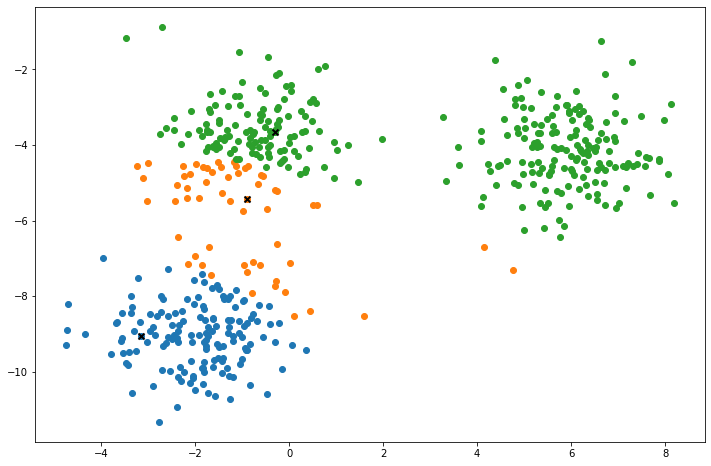

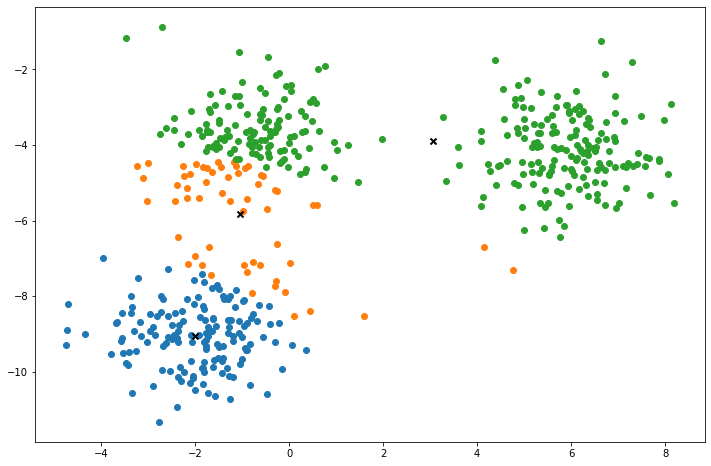

3


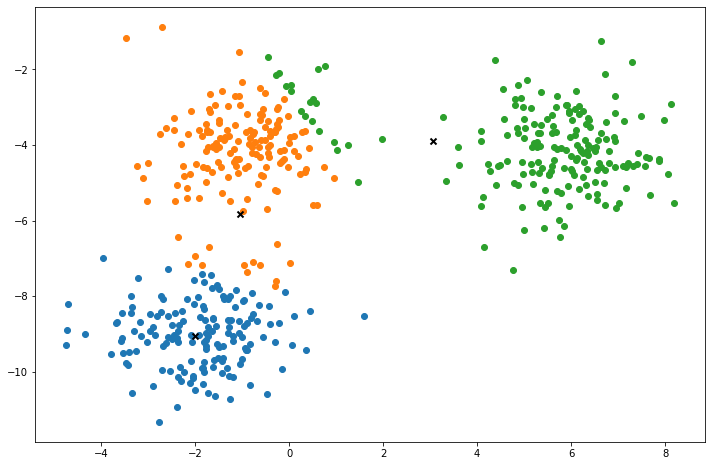

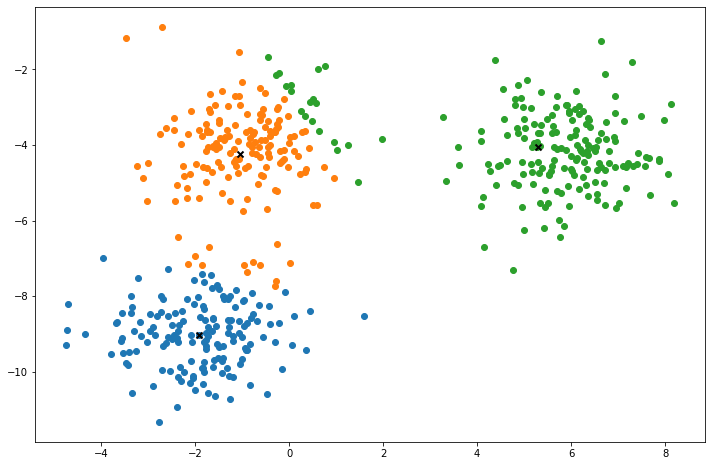

4


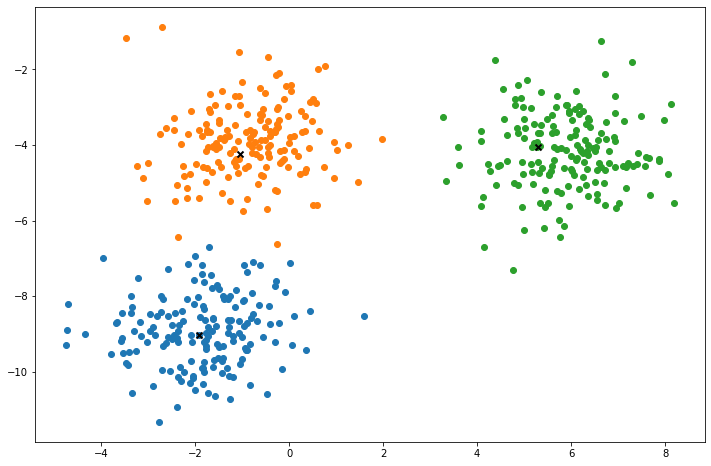

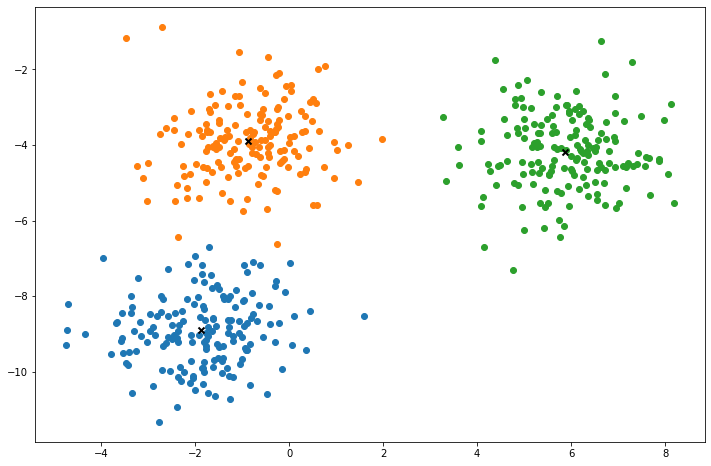

5


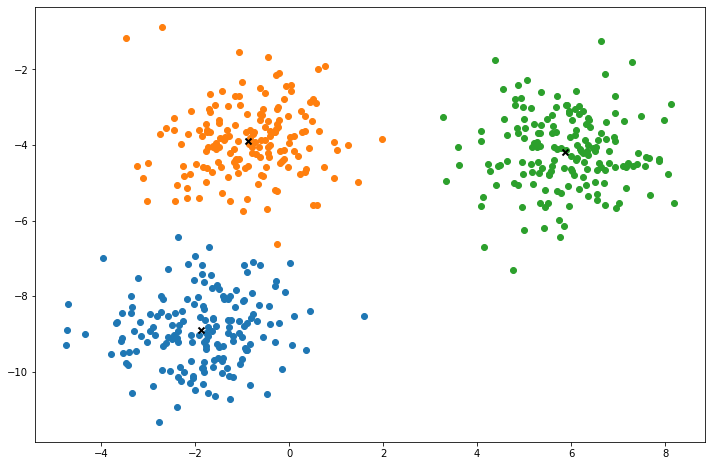

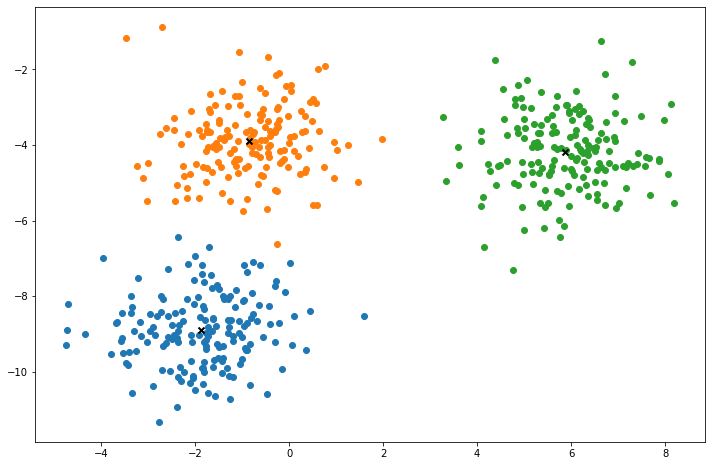

6


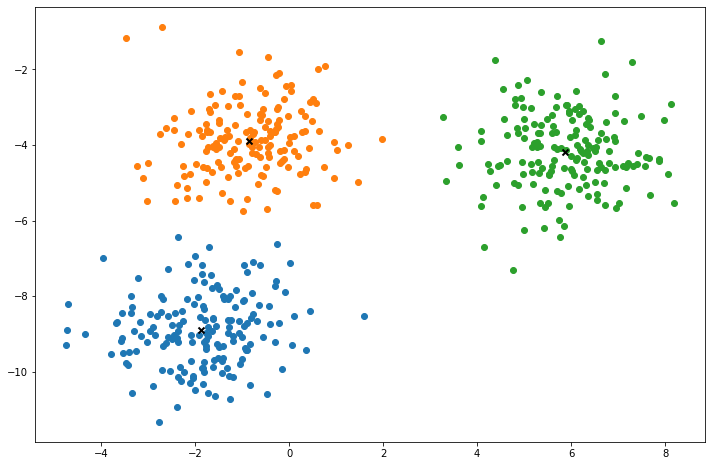

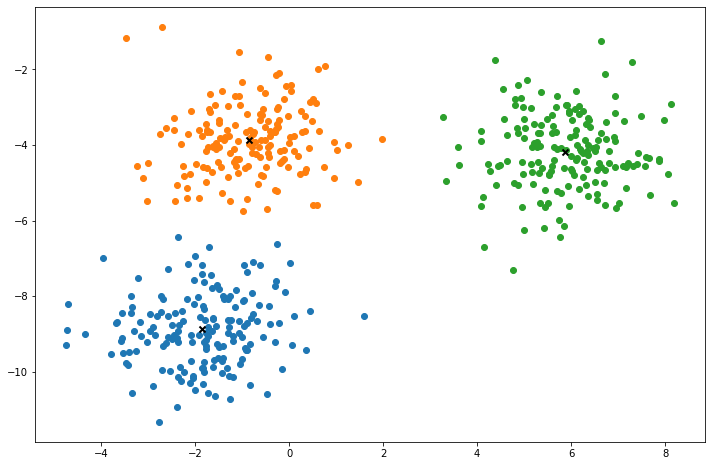

7


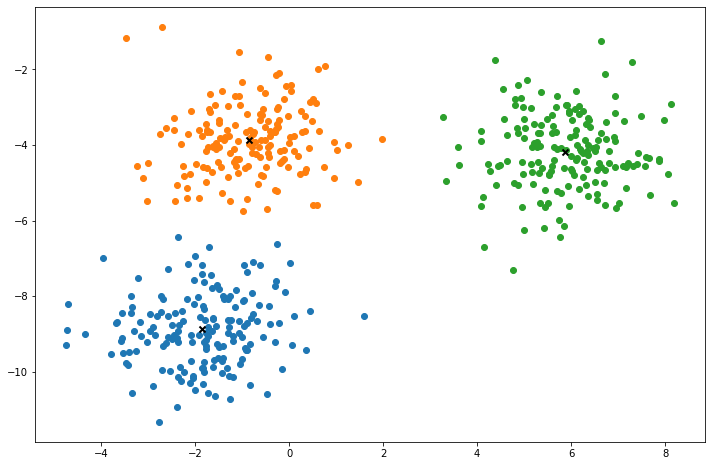

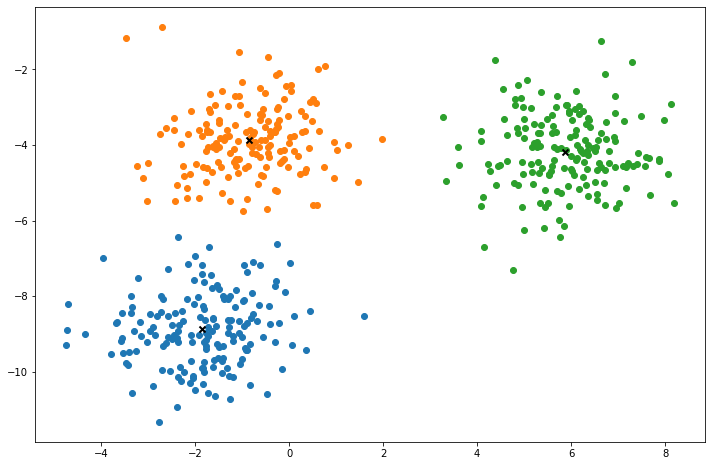

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)
    
clusters = len(np.unique(y))
print(clusters)
k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

In [ ]:
url = "https://i.imgur.com/RArtpOd.png" 
img = io.imread(url)

In [ ]:
img.shape

(500, 500, 4)

In [ ]:
img_init = img.copy()

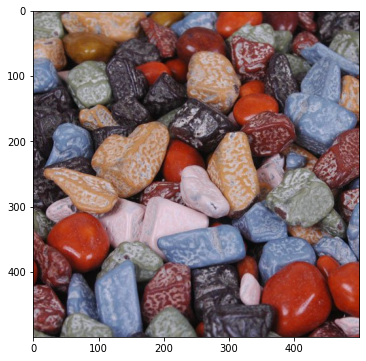

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(img_init)

In [ ]:
img = img.reshape((img.shape[0] * img.shape[1],img.shape[2])) 

In [ ]:
k = KMeans(K=5) 
y_pred = k.predict(img)
k.cent()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


array([[100.92214773,  79.69650084,  84.9459592 , 255.        ],
       [181.75100249, 169.34711494, 177.6009033 , 255.        ],
       [151.87367854,  54.14956126,  33.22434189, 255.        ],
       [142.56591106, 131.45921051, 135.7393821 , 255.        ],
       [ 52.37877163,  33.57614106,  35.55104151, 255.        ]])

In [ ]:
y_pred

array([1., 1., 1., ..., 2., 2., 2.])

In [ ]:
label_indx = np.arange(0,len(np.unique(y_pred)) + 1) 

In [ ]:
label_indx

array([0, 1, 2, 3, 4, 5])

In [ ]:
np.histogram(y_pred, bins = label_indx)

(array([48926, 47382, 33391, 68069, 52232]), array([0, 1, 2, 3, 4, 5]))

In [ ]:
(hist, _) = np.histogram(y_pred, bins = label_indx)
hist = hist.astype("float")
hist /= hist.sum()
hist

array([0.195704, 0.189528, 0.133564, 0.272276, 0.208928])

In [ ]:
hist_bar = np.zeros((50, 300, 3), dtype = "uint8") 

In [ ]:
startX = 0
for (percent, color) in zip(hist,  k.cent()): 
  endX = startX + (percent * 300) # to match grid
  cv2.rectangle(hist_bar, (int(startX), 0), (int(endX), 50),
      color.astype("uint8").tolist(), -1)
  startX = endX

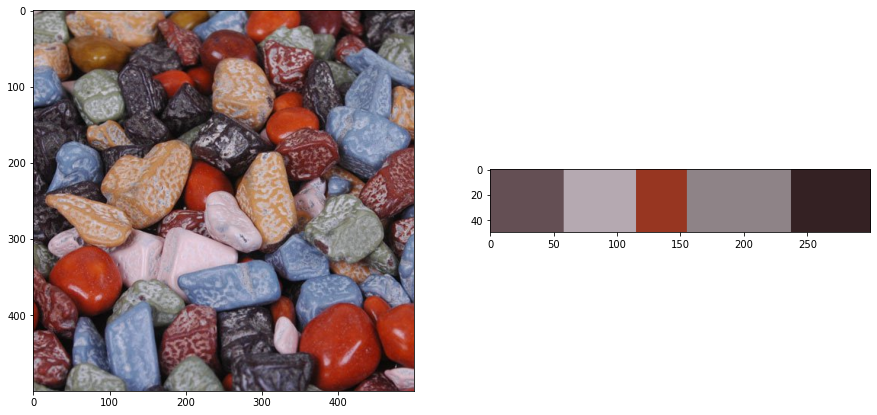

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img_init)
plt.subplot(122)
plt.imshow(hist_bar)
plt.show()

In [ ]:
url = "https://www.teahub.io/photos/full/35-355143_windows-10-wallpaper-umbrella.jpg" 
img = io.imread(url)

In [ ]:
img.shape

(1080, 1920, 3)

In [ ]:
img_init = img.copy()

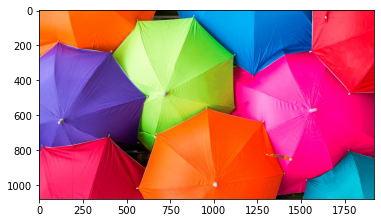

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(img_init)

In [ ]:
img = img.reshape((img.shape[0] * img.shape[1],img.shape[2])) 

In [ ]:
k = KMeans(K=5) 
y_pred = k.predict(img)
k.cent()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


array([[ 53.16708662,  93.69632655, 175.47967713],
       [133.07051658, 195.54817432,  47.66459003],
       [237.62760178,  76.63096981,  21.42656026],
       [248.665852  ,  31.23121874, 121.13346739],
       [206.22142881, 229.36967717, 152.23724866]])

In [ ]:
y_pred

array([2., 2., 2., ..., 0., 0., 0.])

In [ ]:
label_indx = np.arange(0,len(np.unique(y_pred)) + 1) 

In [ ]:
label_indx

array([0, 1, 2, 3, 4, 5])

In [ ]:
np.histogram(y_pred, bins = label_indx)

(array([565545, 172073, 559377, 593291, 183314]), array([0, 1, 2, 3, 4, 5]))

In [ ]:
(hist, _) = np.histogram(y_pred, bins = label_indx)
hist = hist.astype("float")
hist /= hist.sum()
hist

array([0.27273582, 0.08298274, 0.26976128, 0.28611642, 0.08840374])

In [ ]:
hist_bar = np.zeros((50, 300, 3), dtype = "uint8") 

In [ ]:
startX = 0
for (percent, color) in zip(hist,  k.cent()): 
  endX = startX + (percent * 300) # to match grid
  cv2.rectangle(hist_bar, (int(startX), 0), (int(endX), 50),
      color.astype("uint8").tolist(), -1)
  startX = endX

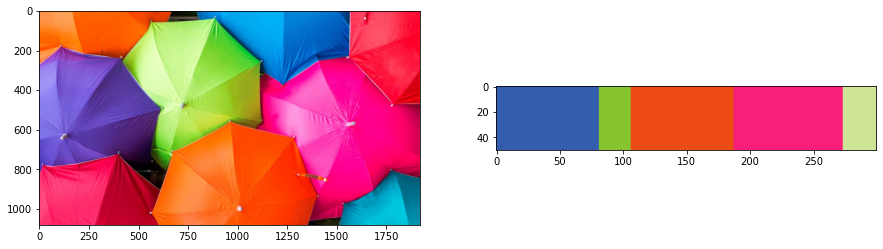

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img_init)
plt.subplot(122)
plt.imshow(hist_bar)
plt.show()